## Practice 1. Perceptron. Palmer_penguins dataset ##

Seperating **Adelie** and **Gentoo** with bill_length and bill_depth  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [29]:
df=pd.read_csv('palmer_penguins.csv')
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...,...
339,339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [41]:
# Filter the dataset to include only 'Adelie' and 'Gentoo' species
df_filtered = df[(df['species'] == 'Adelie') | (df['species'] == 'Gentoo')]


# Drop rows with missing values in 'bill_length_mm' or 'bill_depth_mm'
df_filtered = df_filtered.dropna(subset=['bill_length_mm', 'bill_depth_mm'])


# Assign labels: 1 for 'Adelie', -1 for 'Gentoo'
y = np.where(df_filtered['species'] == 'Adelie', 1, -1)

# obtain the features.
X = df_filtered[['bill_length_mm', 'bill_depth_mm']].values
X

array([[39.1, 18.7],
       [39.5, 17.4],
       [40.3, 18. ],
       [36.7, 19.3],
       [39.3, 20.6],
       [38.9, 17.8],
       [39.2, 19.6],
       [34.1, 18.1],
       [42. , 20.2],
       [37.8, 17.1],
       [37.8, 17.3],
       [41.1, 17.6],
       [38.6, 21.2],
       [34.6, 21.1],
       [36.6, 17.8],
       [38.7, 19. ],
       [42.5, 20.7],
       [34.4, 18.4],
       [46. , 21.5],
       [37.8, 18.3],
       [37.7, 18.7],
       [35.9, 19.2],
       [38.2, 18.1],
       [38.8, 17.2],
       [35.3, 18.9],
       [40.6, 18.6],
       [40.5, 17.9],
       [37.9, 18.6],
       [40.5, 18.9],
       [39.5, 16.7],
       [37.2, 18.1],
       [39.5, 17.8],
       [40.9, 18.9],
       [36.4, 17. ],
       [39.2, 21.1],
       [38.8, 20. ],
       [42.2, 18.5],
       [37.6, 19.3],
       [39.8, 19.1],
       [36.5, 18. ],
       [40.8, 18.4],
       [36. , 18.5],
       [44.1, 19.7],
       [37. , 16.9],
       [39.6, 18.8],
       [41.1, 19. ],
       [37.5, 18.9],
       [36. ,

In [45]:
class Perceptron(object):
    #eta correspond to the update rule.
    def __init__(self, eta = .5, epochs = 50):
        #assign these attributes to the given instances self. 
        # eta is correspoding to the update rule 1/2.
        self.eta = eta #assgn attribute to the instance self 
        self.epochs = epochs 
    # train method.
    def train (self, X, y): #pass in X and y (feature and label)
        #at the instances when calling the train method on an object, assign weights. Making it a random column vector 
        self.w_ = np.random.rand(1 + X.shape[1]) 
        # a list that contain the wrong classfication that we get
        self.errors_ = []

        #update rule 
        for _ in range(self.epochs):
            errors = 0
            #for each epoch
            #zip collect the data and labels into tuples 
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi 
                self.w_[-1] -= update
                errors += int (update != 0)
            self.errors_.append(errors)

        return self
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0,1, -1)
    

In [52]:
percep = Perceptron(epochs=50)
percep.train(X, y)

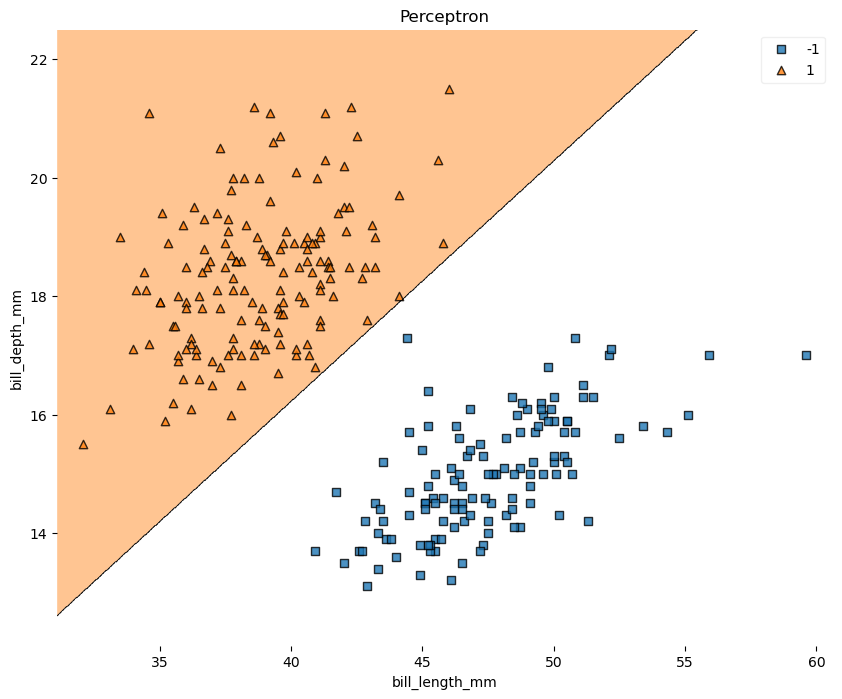

In [53]:
plt.figure(figsize= (10, 8))
plot_decision_regions (X, y, clf=percep)
plt.title("Perceptron")
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.show()

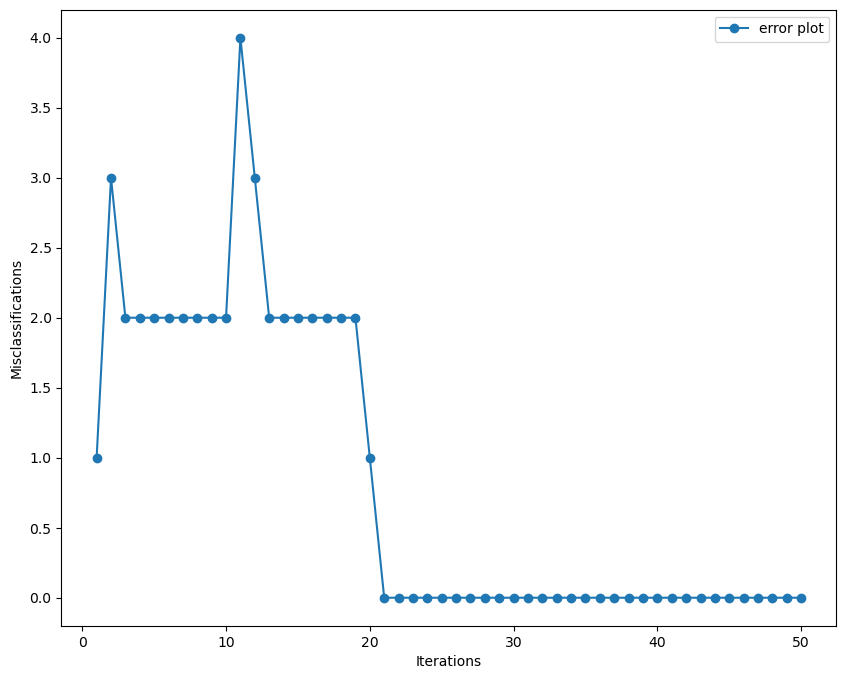

In [54]:
plt.figure(figsize=(10,8))
plt.plot(range(1,len(percep.errors_)+1), percep.errors_,
        marker = "o",
        label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Misclassifications")
plt.legend()
plt.show()